tackling dummies need not apply

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

import math
pd.set_option('display.float_format', '{:.2f}'.format)

from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

In [2]:
games = pd.read_csv('./data/games.csv')
players = pd.read_csv('./data/players.csv')
plays = pd.read_csv('./data/plays.csv')
tackles = pd.read_csv('./data/tackles.csv')
week1 = pd.read_csv('./data/tracking_week_1.csv')
week2 = pd.read_csv('./data/tracking_week_2.csv')
week3 = pd.read_csv('./data/tracking_week_3.csv')
week4 = pd.read_csv('./data/tracking_week_4.csv')
week5 = pd.read_csv('./data/tracking_week_5.csv')
week6 = pd.read_csv('./data/tracking_week_6.csv')
week7 = pd.read_csv('./data/tracking_week_7.csv')
week8 = pd.read_csv('./data/tracking_week_8.csv')
week9 = pd.read_csv('./data/tracking_week_9.csv')

In [3]:
'''week1_events = week1[week1['event'].notna()]
week2_events = week2[week2['event'].notna()]
week3_events = week3[week3['event'].notna()]
week4_events = week4[week4['event'].notna()]
week5_events = week5[week5['event'].notna()]
week6_events = week6[week6['event'].notna()]
week7_events = week7[week7['event'].notna()]
week8_events = week8[week8['event'].notna()]
week9_events = week9[week9['event'].notna()]'''

"week1_events = week1[week1['event'].notna()]\nweek2_events = week2[week2['event'].notna()]\nweek3_events = week3[week3['event'].notna()]\nweek4_events = week4[week4['event'].notna()]\nweek5_events = week5[week5['event'].notna()]\nweek6_events = week6[week6['event'].notna()]\nweek7_events = week7[week7['event'].notna()]\nweek8_events = week8[week8['event'].notna()]\nweek9_events = week9[week9['event'].notna()]"

In [4]:
all_weeks = [week1, week2, week3, week4, week5, week6, week7, week8, week9]

In [5]:
weeks = pd.concat(all_weeks)

In [6]:
weeks

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.00,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.00,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.00,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.00,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.00,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.00,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.00,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.00,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.00,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.00,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150018,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.22,19.68,1.37,2.58,0.15,NaN,NaN,tackle
1150019,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.32,19.61,1.07,2.74,0.12,NaN,NaN,NaN
1150020,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.39,19.56,0.80,2.49,0.09,NaN,NaN,NaN
1150021,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.45,19.52,0.57,2.38,0.07,NaN,NaN,NaN


In [7]:
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/06/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/06/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/06/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/06/2022,20:20:00,KC,TEN,20,17


In [8]:
games_weeks = games[['gameId', 'week']]

In [9]:
games_weeks

,gameId,week
0,2022090800,1
1,2022091100,1
2,2022091101,1
3,2022091102,1
4,2022091103,1
...,...,...
131,2022110607,9
132,2022110608,9
133,2022110609,9
134,2022110610,9


In [10]:
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1678,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1679,55212,6-0,230,NaN,Iowa State,ILB,Jake Hummel
1680,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1681,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


In [11]:
players['totalInches'] = (players.height.str.split("-").str[0].astype(int) * 12) + (
    players.height.str.split("-").str[1].astype(int)
)
players['mass'] = (players['totalInches']/12 * players['weight']).round(2)

In [12]:
plays

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.98,0.02,-0.01,0.01,2.36,0.98,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.16,0.84,-0.01,0.01,1.73,-0.26,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.76,0.24,-0.04,0.04,1.31,1.13,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.62,0.38,-0.00,0.00,1.64,-0.04,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.84,0.16,0.00,-0.00,3.69,-0.17,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,...,0.64,0.36,-0.01,0.01,3.64,-0.50,NaN,NaN,NaN,NaN
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,0.62,0.38,-0.03,0.03,1.43,-0.44,NaN,NaN,NaN,NaN
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,...,0.67,0.33,-0.01,0.01,2.12,0.20,NaN,NaN,NaN,NaN
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,...,0.41,0.59,-0.05,0.05,3.95,-0.98,NaN,NaN,NaN,NaN


In [13]:
plays['gamePlayId'] = plays[['gameId', 'playId']].astype(str).apply(lambda x: ''.join(x), axis=1)
plays['gamePlayId'] = plays['gamePlayId'].astype('int64')

In [14]:
plays = pd.merge(plays, games_weeks, on='gameId', how='left')

In [15]:
plays

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,gamePlayId,week
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,-0.01,0.01,2.36,0.98,NaN,NaN,NaN,NaN,20221009083537,5
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,-0.01,0.01,1.73,-0.26,NaN,NaN,NaN,NaN,20220911033126,1
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,-0.04,0.04,1.31,1.13,NaN,NaN,NaN,NaN,20220911111148,1
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,-0.00,0.00,1.64,-0.04,NaN,NaN,NaN,NaN,20221002122007,4
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.00,-0.00,3.69,-0.17,NaN,NaN,NaN,NaN,20220919001372,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,...,-0.01,0.01,3.64,-0.50,NaN,NaN,NaN,NaN,2022100204123,4
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,-0.03,0.03,1.43,-0.44,NaN,NaN,NaN,NaN,20220912003467,1
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,...,-0.01,0.01,2.12,0.20,NaN,NaN,NaN,NaN,20221016053371,6
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,...,-0.05,0.05,3.95,-0.98,NaN,NaN,NaN,NaN,20221002072777,4


In [16]:
tackles

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1
17422,2022092502,3510,42406,0,0,0,1
17423,2022091113,3642,43478,0,0,0,1
17424,2022091901,3578,42431,0,0,0,1


In [17]:
tackles['gamePlayId'] = tackles[['gameId', 'playId']].astype(str).apply(lambda x: ''.join(x), axis=1)
tackles['gamePlayId'] = tackles['gamePlayId'].astype('int64')
tackles.rename(columns={'tackle':'tackler'}, inplace=True)

In [18]:
tackles = pd.merge(tackles, games_weeks, on=['gameId'], how='left')

In [19]:
tackles

,gameId,playId,nflId,tackler,assist,forcedFumble,pff_missedTackle,gamePlayId,week
0,2022090800,101,42816,1,0,0,0,2022090800101,1
1,2022090800,393,46232,1,0,0,0,2022090800393,1
2,2022090800,486,40166,1,0,0,0,2022090800486,1
3,2022090800,646,47939,1,0,0,0,2022090800646,1
4,2022090800,818,40107,1,0,0,0,2022090800818,1
...,...,...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1,20220911132494,1
17422,2022092502,3510,42406,0,0,0,1,20220925023510,3
17423,2022091113,3642,43478,0,0,0,1,20220911133642,1
17424,2022091901,3578,42431,0,0,0,1,20220919013578,2


In [20]:
weeks['gamePlayId'] = weeks[['gameId', 'playId']].astype(str).apply(lambda x: ''.join(x), axis=1)
weeks['gamePlayId'] = weeks['gamePlayId'].astype('int64')

In [21]:
weeks.drop(columns=['time', 'jerseyNumber', 'playDirection'], inplace=True)

In [22]:
weeks = pd.merge(weeks, tackles, on=['gameId','playId','nflId','gamePlayId'], how='left')

In [23]:
weeks = weeks.drop('week', axis=1)

In [24]:
weeks = pd.merge(weeks, players, on=['nflId','displayName'], how='left')

In [25]:
weeks.drop(['height', 'weight', 'birthDate', 'collegeName'], axis=1, inplace=True)

Before changing both handoffs and passes caught to a transfer event, a new column 'playType' will identify pass vs run plays based on these two event types. 

In [26]:
weeks['playType'] = np.where(weeks['event']=='handoff', 'run', 0)

In [27]:
weeks['playType'] = np.where(weeks['event']=='pass_outcome_caught', 'pass', weeks['playType'])

In [28]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,...,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType
0,2022090800,56,35472.00,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
1,2022090800,56,35472.00,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,...,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
2,2022090800,56,35472.00,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
3,2022090800,56,35472.00,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
4,2022090800,56,35472.00,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,football,26.22,19.68,1.37,2.58,...,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12187394,2022110700,3787,NaN,football,41,football,26.32,19.61,1.07,2.74,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12187395,2022110700,3787,NaN,football,42,football,26.39,19.56,0.80,2.49,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12187396,2022110700,3787,NaN,football,43,football,26.45,19.52,0.57,2.38,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# To Expand Play Types To All Rows in Each gamePlayId Group

In [29]:
weeks_playtype = weeks[['gamePlayId', 'playType']]

In [30]:
weeks_playtype

,gamePlayId,playType
0,202209080056,0
1,202209080056,0
2,202209080056,0
3,202209080056,0
4,202209080056,0
...,...,...
12187393,20221107003787,0
12187394,20221107003787,0
12187395,20221107003787,0
12187396,20221107003787,0


In [31]:
grouped_playtype = weeks_playtype.groupby(['gamePlayId']).max().reset_index()

In [32]:
grouped_playtype

,gamePlayId,playType
0,202209080056,pass
1,202209080080,0
2,202209110057,0
3,202209110078,run
4,202209110185,pass
...,...,...
12481,20221107003658,run
12482,20221107003686,run
12483,20221107003707,run
12484,20221107003740,run


In [33]:
grouped_playtype['playType'].value_counts()

run     5876
pass    5646
0        964
Name: playType, dtype: int64

In [34]:
grouped_playtype['playType'] = np.where(grouped_playtype['playType']=='0', 'direct', grouped_playtype['playType'])

In [35]:
grouped_playtype['playType'].value_counts()

run       5876
pass      5646
direct     964
Name: playType, dtype: int64

In [36]:
grouped_playtype

,gamePlayId,playType
0,202209080056,pass
1,202209080080,direct
2,202209110057,direct
3,202209110078,run
4,202209110185,pass
...,...,...
12481,20221107003658,run
12482,20221107003686,run
12483,20221107003707,run
12484,20221107003740,run


In [37]:
weeks = pd.merge(weeks, grouped_playtype, on=['gamePlayId'], how='left')

In [38]:
weeks = weeks.drop('playType_x', axis=1)

In [39]:
weeks.rename(columns={'playType_y':'playType'}, inplace=True)

In [40]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,...,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType
0,2022090800,56,35472.00,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
1,2022090800,56,35472.00,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,...,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
2,2022090800,56,35472.00,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
3,2022090800,56,35472.00,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
4,2022090800,56,35472.00,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,football,26.22,19.68,1.37,2.58,...,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run
12187394,2022110700,3787,NaN,football,41,football,26.32,19.61,1.07,2.74,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run
12187395,2022110700,3787,NaN,football,42,football,26.39,19.56,0.80,2.49,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run
12187396,2022110700,3787,NaN,football,43,football,26.45,19.52,0.57,2.38,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run


In [41]:
weeks['playType'].value_counts()

run       7448156
pass      3733153
direct    1006089
Name: playType, dtype: int64

# Developing a Ball Location Metric

In [42]:
pd.options.display.max_columns = None
plays.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,gamePlayId,week
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.00,NaN,9,9,N,69,SHOTGUN,7.00,0.75,0.98,0.02,-0.01,0.01,2.36,0.98,NaN,NaN,NaN,NaN,20221009083537,5
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.00,0.42,0.16,0.84,-0.01,0.01,1.73,-0.26,NaN,NaN,NaN,NaN,20220911033126,1
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.00,NaN,15,15,N,40,I_FORM,6.00,0.27,0.76,0.24,-0.04,0.04,1.31,1.13,NaN,NaN,NaN,NaN,20220911111148,1
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.00,0.59,0.62,0.38,-0.00,0.00,1.64,-0.04,NaN,NaN,NaN,NaN,20221002122007,4
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.00,0.47,0.84,0.16,0.00,-0.00,3.69,-0.17,NaN,NaN,NaN,NaN,20220919001372,2


In [43]:
plays_merge = plays[['gameId','playId','gamePlayId','absoluteYardlineNumber','ballCarrierId','quarter','possessionTeam',
                     'defensiveTeam','playResult', 'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox']]

In [44]:
plays_merge

,gameId,playId,gamePlayId,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox
0,2022100908,3537,20221009083537,69,48723,4,ATL,TB,9,1,10,SHOTGUN,7.00
1,2022091103,3126,20220911033126,76,52457,4,PIT,CIN,3,1,10,SHOTGUN,7.00
2,2022091111,1148,20220911111148,40,42547,2,LV,LAC,15,2,5,I_FORM,6.00
3,2022100212,2007,20221002122007,47,46461,3,DEN,LV,7,2,10,SINGLEBACK,6.00
4,2022091900,1372,20220919001372,75,47857,2,BUF,TEN,3,1,10,I_FORM,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,2022100204123,49,43293,1,DAL,WAS,1,1,10,SINGLEBACK,6.00
12482,2022091200,3467,20220912003467,40,46189,4,SEA,DEN,2,1,10,SINGLEBACK,7.00
12483,2022101605,3371,20221016053371,69,44860,4,CIN,NO,6,1,10,SHOTGUN,6.00
12484,2022100207,2777,20221002072777,44,52449,3,IND,TEN,-2,1,10,SHOTGUN,6.00


In [45]:
weeks = pd.merge(weeks, plays_merge, on=['gameId','playId','gamePlayId'], how='left')

In [46]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox
0,2022090800,56,35472.00,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
1,2022090800,56,35472.00,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
2,2022090800,56,35472.00,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
3,2022090800,56,35472.00,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
4,2022090800,56,35472.00,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,football,26.22,19.68,1.37,2.58,0.15,NaN,NaN,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00
12187394,2022110700,3787,NaN,football,41,football,26.32,19.61,1.07,2.74,0.12,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00
12187395,2022110700,3787,NaN,football,42,football,26.39,19.56,0.80,2.49,0.09,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00
12187396,2022110700,3787,NaN,football,43,football,26.45,19.52,0.57,2.38,0.07,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00


In [47]:
games_merge = games[['gameId', 'week', 'homeTeamAbbr', 'visitorTeamAbbr']]

In [48]:
weeks = pd.merge(weeks, games_merge, on=['gameId'], how='left')

In [49]:
weeks['nflId'] = weeks['nflId'].fillna(0)

In [50]:
weeks['nflId'] = weeks['nflId'].astype(int)

In [51]:
weeks['nflId'].isna().sum()

0

In [52]:
weeks['xBallLocation'] = np.where(weeks['ballCarrierId'] == weeks['nflId'], weeks['x'], 0)
weeks['yBallLocation'] = np.where(weeks['ballCarrierId'] == weeks['nflId'], weeks['y'], 0)

In [53]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,0,football,40,football,26.22,19.68,1.37,2.58,0.15,NaN,NaN,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00
12187394,2022110700,3787,0,football,41,football,26.32,19.61,1.07,2.74,0.12,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00
12187395,2022110700,3787,0,football,42,football,26.39,19.56,0.80,2.49,0.09,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00
12187396,2022110700,3787,0,football,43,football,26.45,19.52,0.57,2.38,0.07,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00


To create the total yards on the play between the first frame and the last frame. 

In [54]:
weeks['firstFrame'] = weeks.groupby('gamePlayId')['frameId'].transform('min')

In [55]:
weeks['lastFrame'] = weeks.groupby('gamePlayId')['frameId'].transform('max')

In [56]:
weeks['xFirstFrame'] = np.where(weeks['frameId'] == weeks['firstFrame'], weeks['xBallLocation'], 0)
weeks['xLastFrame'] = np.where(weeks['frameId'] == weeks['lastFrame'], weeks['xBallLocation'], 0)

In [57]:
weeks['xFirstFrame'] = weeks.groupby('gamePlayId')['xFirstFrame'].transform(max)
weeks['xLastFrame'] = weeks.groupby('gamePlayId')['xLastFrame'].transform(max)

In [58]:
weeks['xFrameChange'] = (weeks['xLastFrame'] - weeks['xFirstFrame']).abs()

In [59]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,0,football,40,football,26.22,19.68,1.37,2.58,0.15,NaN,NaN,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00,1,44,15.85,26.41,10.56
12187394,2022110700,3787,0,football,41,football,26.32,19.61,1.07,2.74,0.12,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00,1,44,15.85,26.41,10.56
12187395,2022110700,3787,0,football,42,football,26.39,19.56,0.80,2.49,0.09,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00,1,44,15.85,26.41,10.56
12187396,2022110700,3787,0,football,43,football,26.45,19.52,0.57,2.38,0.07,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00,1,44,15.85,26.41,10.56


In [60]:
ball_location = weeks.loc[weeks.nflId == weeks.ballCarrierId]

In [61]:
ball_location

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange
88,2022090800,56,42489,Stefon Diggs,1,BUF,80.60,38.29,6.23,0.90,0.62,140.05,189.38,NaN,202209080056,NaN,NaN,NaN,NaN,WR,72.00,1146.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09
89,2022090800,56,42489,Stefon Diggs,2,BUF,80.48,37.68,6.24,1.27,0.62,134.22,191.08,pass_arrived,202209080056,NaN,NaN,NaN,NaN,WR,72.00,1146.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,1,22,80.60,79.51,1.09
90,2022090800,56,42489,Stefon Diggs,3,BUF,80.34,37.09,5.98,2.48,0.60,127.16,194.40,NaN,202209080056,NaN,NaN,NaN,NaN,WR,72.00,1146.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,1,22,80.60,79.51,1.09
91,2022090800,56,42489,Stefon Diggs,4,BUF,80.19,36.53,5.67,3.37,0.58,120.72,196.97,NaN,202209080056,NaN,NaN,NaN,NaN,WR,72.00,1146.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,1,22,80.60,79.51,1.09
92,2022090800,56,42489,Stefon Diggs,5,BUF,80.01,36.00,5.43,3.65,0.56,118.07,199.54,NaN,202209080056,NaN,NaN,NaN,NaN,WR,72.00,1146.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,1,22,80.60,79.51,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12186513,2022110700,3787,43525,Dwayne Washington,40,NO,26.24,19.72,1.60,4.04,0.18,103.01,121.39,tackle,20221107003787,NaN,NaN,NaN,NaN,RB,73.00,1356.58,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56
12186514,2022110700,3787,43525,Dwayne Washington,41,NO,26.34,19.66,1.04,4.24,0.12,108.55,120.45,NaN,20221107003787,NaN,NaN,NaN,NaN,RB,73.00,1356.58,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,1,44,15.85,26.41,10.56
12186515,2022110700,3787,43525,Dwayne Washington,42,NO,26.40,19.62,0.54,4.13,0.07,112.22,125.47,NaN,20221107003787,NaN,NaN,NaN,NaN,RB,73.00,1356.58,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,1,44,15.85,26.41,10.56
12186516,2022110700,3787,43525,Dwayne Washington,43,NO,26.42,19.58,0.25,3.65,0.05,113.85,171.35,NaN,20221107003787,NaN,NaN,NaN,NaN,RB,73.00,1356.58,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,1,44,15.85,26.41,10.56


In [62]:
ball_location = ball_location[['gamePlayId', 'frameId', 'xBallLocation', 'yBallLocation']]

In [63]:
ball_location

,gamePlayId,frameId,xBallLocation,yBallLocation
88,202209080056,1,80.60,38.29
89,202209080056,2,80.48,37.68
90,202209080056,3,80.34,37.09
91,202209080056,4,80.19,36.53
92,202209080056,5,80.01,36.00
...,...,...,...,...
12186513,20221107003787,40,26.24,19.72
12186514,20221107003787,41,26.34,19.66
12186515,20221107003787,42,26.40,19.62
12186516,20221107003787,43,26.42,19.58


In [64]:
weeks = pd.merge(weeks, ball_location, on=['gamePlayId', 'frameId', 'xBallLocation', 'yBallLocation'], how='left')

In [65]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00,1,22,80.60,79.51,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,0,football,40,football,26.22,19.68,1.37,2.58,0.15,NaN,NaN,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00,1,44,15.85,26.41,10.56
12187394,2022110700,3787,0,football,41,football,26.32,19.61,1.07,2.74,0.12,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00,1,44,15.85,26.41,10.56
12187395,2022110700,3787,0,football,42,football,26.39,19.56,0.80,2.49,0.09,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00,1,44,15.85,26.41,10.56
12187396,2022110700,3787,0,football,43,football,26.45,19.52,0.57,2.38,0.07,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00,1,44,15.85,26.41,10.56


In [66]:
weeks['xBallLocation'] = weeks.groupby(['gamePlayId', 'frameId'])['xBallLocation'].transform(max)
weeks['yBallLocation'] = weeks.groupby(['gamePlayId', 'frameId'])['yBallLocation'].transform(max)

In [67]:
weeks['ballDistance'] = np.sqrt((weeks['xBallLocation'] - weeks['x']) ** 2 + (weeks['yBallLocation'] - weeks['y']) ** 2)

In [68]:
weeks = weeks[weeks.displayName != 'football']

In [69]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,1,22,80.60,79.51,1.09,13.23
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,1,22,80.60,79.51,1.09,13.01
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,1,22,80.60,79.51,1.09,12.81
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,1,22,80.60,79.51,1.09,12.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,3.19
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,1,44,15.85,26.41,10.56,3.15
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,1,44,15.85,26.41,10.56,3.07
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,1,44,15.85,26.41,10.56,2.96


In [70]:
weeks['ballDistance'].max()

104.74342461462676

In [71]:
count = weeks['ballDistance'].lt(1).sum()
print(count)

906197


In [72]:
count = weeks['ballDistance'].lt(.05).sum()
print(count)

526769


In [73]:
count = weeks['ballDistance'].lt(.0001).sum()
print(count)

525986


# Setting Up A Player Direction vs Ball Carrier Direction

In [74]:
weeks['dirBallCarrier'] = np.where(weeks['ballCarrierId'] == weeks['nflId'], weeks['dir'], 0)

In [75]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,0.00
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,1,22,80.60,79.51,1.09,13.23,0.00
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,1,22,80.60,79.51,1.09,13.01,0.00
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,1,22,80.60,79.51,1.09,12.81,0.00
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,1,22,80.60,79.51,1.09,12.67,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,3.19,0.00
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,1,44,15.85,26.41,10.56,3.15,0.00
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,1,44,15.85,26.41,10.56,3.07,0.00
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,1,44,15.85,26.41,10.56,2.96,0.00


In [76]:
weeks['dirBallCarrier'] = weeks.groupby(['gamePlayId', 'frameId'])['dirBallCarrier'].transform(max)

In [77]:
weeks['dirBallVariance'] = np.minimum(((weeks['dir'] - weeks['dirBallCarrier']).abs()), (360-(weeks['dir'] - weeks['dirBallCarrier']).abs()))

In [78]:
pd.options.display.max_columns = None
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,1,22,80.60,79.51,1.09,13.23,191.08,42.55
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,1,22,80.60,79.51,1.09,13.01,194.40,47.35
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,1,22,80.60,79.51,1.09,12.81,196.97,51.55
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,1,22,80.60,79.51,1.09,12.67,199.54,57.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,3.19,121.39,6.12
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,1,44,15.85,26.41,10.56,3.15,120.45,2.28
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,1,44,15.85,26.41,10.56,3.07,125.47,5.30
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,1,44,15.85,26.41,10.56,2.96,171.35,48.20


In [79]:
weeks['momentum'] = ((weeks['s'] * weeks['mass']).round(2))/1000
weeks['force'] = ((weeks['a'] * weeks['mass']).round(2))/1000

In [80]:
weeks['momemtumVector'] = (weeks['momentum'] * weeks['dirBallVariance']).round()
weeks['forceVector'] = (weeks['force'] * weeks['dirBallVariance']).round()

# Create a Snap Event at FrameId 1

In [81]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,1,22,80.60,79.51,1.09,13.23,191.08,42.55,3.48,1.27,148.00,54.00
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,1,22,80.60,79.51,1.09,13.01,194.40,47.35,3.27,1.02,155.00,48.00
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,1,22,80.60,79.51,1.09,12.81,196.97,51.55,3.00,1.86,155.00,96.00
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,1,22,80.60,79.51,1.09,12.67,199.54,57.59,2.69,2.59,155.00,149.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,3.19,121.39,6.12,3.23,1.90,20.00,12.00
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,1,44,15.85,26.41,10.56,3.15,120.45,2.28,3.13,1.84,7.00,4.00
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,1,44,15.85,26.41,10.56,3.07,125.47,5.30,2.97,1.90,16.00,10.00
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,1,44,15.85,26.41,10.56,2.96,171.35,48.20,2.79,2.04,134.00,98.00


In [82]:
weeks = weeks[weeks.event !='ball_snap']

In [83]:
weeks['event'] = np.where(weeks['frameId']==1, 'snap', weeks['event'])

# Creating Yards from Different Events on Different Rows

In [84]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,1,22,80.60,79.51,1.09,13.23,191.08,42.55,3.48,1.27,148.00,54.00
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,1,22,80.60,79.51,1.09,13.01,194.40,47.35,3.27,1.02,155.00,48.00
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,1,22,80.60,79.51,1.09,12.81,196.97,51.55,3.00,1.86,155.00,96.00
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,1,22,80.60,79.51,1.09,12.67,199.54,57.59,2.69,2.59,155.00,149.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,3.19,121.39,6.12,3.23,1.90,20.00,12.00
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,1,44,15.85,26.41,10.56,3.15,120.45,2.28,3.13,1.84,7.00,4.00
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,1,44,15.85,26.41,10.56,3.07,125.47,5.30,2.97,1.90,16.00,10.00
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,1,44,15.85,26.41,10.56,2.96,171.35,48.20,2.79,2.04,134.00,98.00


In [85]:
weeks['event'] = np.where(weeks['event']=='pass_outcome_caught', 'transfer', weeks['event'])

In [86]:
weeks['event'] = np.where(weeks['event']=='handoff', 'transfer', weeks['event'])

In [87]:
weeks_events = weeks[weeks['event'].notna()]

In [88]:
weeks_events.rename(columns={'tackle':'tackler'}, inplace=True)

In [89]:
drop_events = ['pass_arrived', 'run', 'man_in_motion', 'play_action', 'shift', 'qb_slide', 'pass_forward', 'touchdown', 
               'lateral', 'line_set', 'snap_direct', 'autoevent_ballsnap', 'fumble_offense_recovered', 'run_pass_option', 
               'pass_shovel', 'fumble_defense_recovered', 'qb_sack', 'autoevent_passinterrupted', 'autoevent_passforward',
              'pass_outcome_touchdown','penalty_accepted', 'penalty_flag', 'safety']

In [90]:
weeks_events = weeks_events[~weeks_events.event.isin(drop_events)]

In [91]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,12.61,202.20,62.79,2.40,2.96,151.00,186.00
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,11.18,78.02,135.94,3.59,0.54,488.00,74.00
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,11.01,189.38,142.29,1.80,5.53,256.00,787.00
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,7.07,202.20,155.51,4.86,3.80,756.00,592.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,12.34,121.39,70.01,1.99,2.48,139.00,174.00
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,1,44,15.85,26.41,10.56,5.92,81.54,109.99,0.02,0.02,2.00,2.00
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,1,44,15.85,26.41,10.56,5.20,143.84,34.17,1.52,2.02,52.00,69.00
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,22.56,21.40,1,44,15.85,26.41,10.56,1.05,104.41,32.45,3.40,1.11,110.00,36.00


In [92]:
weeks_events_merge = weeks_events[['gamePlayId', 'event']]

In [93]:
weeks_events_merge

,gamePlayId,event
0,202209080056,snap
5,202209080056,transfer
17,202209080056,tackle
22,202209080056,snap
27,202209080056,transfer
...,...,...
12187305,20221107003787,tackle
12187310,20221107003787,snap
12187324,20221107003787,transfer
12187338,20221107003787,first_contact


In [94]:
event_dummies = pd.get_dummies(weeks_events_merge['event'])

In [95]:
event_dummies

,first_contact,fumble,out_of_bounds,snap,tackle,transfer
0,0,0,0,1,0,0
5,0,0,0,0,0,1
17,0,0,0,0,1,0
22,0,0,0,1,0,0
27,0,0,0,0,0,1
...,...,...,...,...,...,...
12187305,0,0,0,0,1,0
12187310,0,0,0,1,0,0
12187324,0,0,0,0,0,1
12187338,1,0,0,0,0,0


In [96]:
weeks_events_merge = pd.concat([weeks_events_merge, event_dummies], axis=1) 
weeks_events_merge.drop(['event'], inplace=True, axis=1)
weeks_events_merge.drop(['gamePlayId'], inplace=True, axis=1)

In [97]:
weeks_events_merge

,first_contact,fumble,out_of_bounds,snap,tackle,transfer
0,0,0,0,1,0,0
5,0,0,0,0,0,1
17,0,0,0,0,1,0
22,0,0,0,1,0,0
27,0,0,0,0,0,1
...,...,...,...,...,...,...
12187305,0,0,0,0,1,0
12187310,0,0,0,1,0,0
12187324,0,0,0,0,0,1
12187338,1,0,0,0,0,0


In [98]:
weeks_events_merge.apply(pd.Series.value_counts)

,first_contact,fumble,out_of_bounds,snap,tackle,transfer
0,791582,1020998,983488,748682,802406,769384
1,231726,2310,39820,274626,220902,253924


In [99]:
weeks_events = pd.concat([weeks_events, weeks_events_merge], axis=1)

In [100]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,1,44,15.85,26.41,10.56,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,1,44,15.85,26.41,10.56,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,22.56,21.40,1,44,15.85,26.41,10.56,1.05,104.41,32.45,3.40,1.11,110.00,36.00,1,0,0,0,0,0


In [101]:
weeks_events['xSnap'] = np.where(weeks_events['snap'] == 1, weeks_events['x'], 0)
weeks_events['ySnap'] = np.where(weeks_events['snap'] == 1, weeks_events['y'], 0)
weeks_events['xContact'] = np.where(weeks_events['first_contact'] == 1, weeks_events['x'], 0)
weeks_events['yContact'] = np.where(weeks_events['first_contact'] == 1, weeks_events['y'], 0)
weeks_events['xTransfer'] = np.where(weeks_events['transfer'] == 1, weeks_events['x'], 0)
weeks_events['yTransfer'] = np.where(weeks_events['transfer'] == 1, weeks_events['y'], 0)
weeks_events['xTackle'] = np.where(weeks_events['tackle'] == 1, weeks_events['x'], 0)
weeks_events['yTackle'] = np.where(weeks_events['tackle'] == 1, weeks_events['y'], 0)

In [102]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,0.00,0.00,0.00,0.00
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,0.00,0.00,0.00,0.00,88.80,26.70,0.00,0.00
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,88.23,27.09
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,0.00,0.00,0.00,0.00
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,0.00,0.00,0.00,0.00,78.11,28.74,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,33.45,29.73
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,1,44,15.85,26.41,10.56,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0,20.17,21.95,0.00,0.00,0.00,0.00,0.00,0.00
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,1,44,15.85,26.41,10.56,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1,0.00,0.00,0.00,0.00,20.72,21.29,0.00,0.00
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,22.56,21.40,1,44,15.85,26.41,10.56,1.05,104.41,32.45,3.40,1.11,110.00,36.00,1,0,0,0,0,0,0.00,0.00,21.51,21.41,0.00,0.00,0.00,0.00


To mark each event location for each player for all snaps. 

In [103]:
event_locations = ['xSnap', 'ySnap', 'xContact', 'yContact', 'xTransfer', 'yTransfer', 'xTackle', 'yTackle']

In [104]:
for i in event_locations:
    weeks_events[i] = weeks_events.groupby(['gamePlayId', 'nflId'])[i].transform(max)

In [105]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0,32.50,34.76,33.99,33.10,32.96,34.84,33.45,29.73
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,1,44,15.85,26.41,10.56,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,1,44,15.85,26.41,10.56,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,22.56,21.40,1,44,15.85,26.41,10.56,1.05,104.41,32.45,3.40,1.11,110.00,36.00,1,0,0,0,0,0,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19


In [106]:
weeks_events['snapToTransfer'] = np.where((weeks_events['xSnap'] > 0) & (weeks_events['xTransfer'] > 0),
                                       (np.sqrt((weeks_events['xTransfer'] - weeks_events['xSnap']) ** 2 + (weeks_events['yTransfer'] - weeks_events['ySnap']) ** 2)), 0)

weeks_events['transferToContact'] = np.where((weeks_events['xTransfer'] > 0) & (weeks_events['xContact'] > 0),
                                       (np.sqrt((weeks_events['xContact'] - weeks_events['xTransfer']) ** 2 + (weeks_events['yContact'] - weeks_events['yTransfer']) ** 2)), 0)

weeks_events['transferToTackle'] = np.where((weeks_events['xTransfer'] > 0) & (weeks_events['xTackle'] > 0),
                                       (np.sqrt((weeks_events['xTackle'] - weeks_events['xTransfer']) ** 2 + (weeks_events['yTackle'] - weeks_events['yTransfer']) ** 2)), 0)

weeks_events['contactToTackle'] = np.where((weeks_events['xContact'] > 0) & (weeks_events['xTackle'] > 0),
                                       (np.sqrt((weeks_events['xTackle'] - weeks_events['xContact']) ** 2 + (weeks_events['yTackle'] - weeks_events['yContact']) ** 2)), 0)

weeks_events['snapToTackle'] = np.where((weeks_events['xSnap'] > 0) & (weeks_events['xTackle'] > 0),
                                       (np.sqrt((weeks_events['xTackle'] - weeks_events['xSnap']) ** 2 + (weeks_events['yTackle'] - weeks_events['ySnap']) ** 2)), 0)

weeks_events['snapToContact'] = np.where((weeks_events['xSnap'] > 0) & (weeks_events['xContact'] > 0),
                                       (np.sqrt((weeks_events['xContact'] - weeks_events['xSnap']) ** 2 + (weeks_events['yContact'] - weeks_events['ySnap']) ** 2)), 0)
                                     

In [107]:
weeks_events['transferToTackle'] = np.where((weeks_events['xTransfer'] == 0) & (weeks_events['xTackle'] > 0),
                                       (np.sqrt((weeks_events['xTackle'] - weeks_events['xSnap']) ** 2 + (weeks_events['yTackle'] - weeks_events['ySnap']) ** 2)),
                                           weeks_events['transferToTackle'])

In [108]:
team_yards = weeks_events.groupby('defensiveTeam').agg(
    SnapToTransferYards=('snapToTransfer', 'mean'),
    SnapToContactYards=('snapToContact', 'mean'),
    SnapToTackleYards=('snapToTackle', 'mean'),
    TransferToContactYards=('transferToContact', 'mean'),
    ContactToTackleYards=('contactToTackle', 'mean'),
    TransferToTackleYards=('transferToTackle', 'mean')
    
).reset_index()

# Sort teams by total tackles in descending order
team_yards_sorted = team_yards.sort_values(by='defensiveTeam')

team_yards_sorted.head(10)

,defensiveTeam,SnapToTransferYards,SnapToContactYards,SnapToTackleYards,TransferToContactYards,ContactToTackleYards,TransferToTackleYards
0,ARI,1.89,5.22,6.92,3.64,3.00,6.01
1,ATL,1.90,4.77,6.54,3.26,2.84,5.51
2,BAL,1.86,5.08,6.42,3.54,2.76,5.48
3,BUF,1.88,5.35,6.93,3.62,3.01,5.92
4,CAR,1.99,5.23,6.68,3.56,2.85,5.59
5,CHI,1.99,5.85,7.24,4.04,3.05,6.20
6,CIN,2.04,5.40,7.23,3.48,2.81,6.04
7,CLE,1.92,5.48,6.80,3.94,2.89,5.80
8,DAL,1.95,5.33,6.87,3.66,2.64,5.78
9,DEN,1.87,4.73,6.41,3.20,2.85,5.40


In [109]:
tackler_yards = weeks_events.groupby('tackler').agg(
    SnapToTransferYards=('snapToTransfer', 'mean'),
    SnapToContactYards=('snapToContact', 'mean'),
    SnapToTackleYards=('snapToTackle', 'mean'),
    TransferToContactYards=('transferToContact', 'mean'),
    ContactToTackleYards=('contactToTackle', 'mean'),
    TransferToTackleYards=('transferToTackle', 'mean')
    
).reset_index()

# Sort teams by total tackles in descending order
tackler_yards_sorted = tackler_yards.sort_values(by='tackler')

tackler_yards_sorted

,tackler,SnapToTransferYards,SnapToContactYards,SnapToTackleYards,TransferToContactYards,ContactToTackleYards,TransferToTackleYards
0,0.00,2.06,6.26,8.18,4.57,3.80,7.24
1,1.00,2.29,6.39,7.71,4.43,3.03,6.45


In [110]:
ballDistance_yards = weeks_events.groupby('tackler').agg(
    BallDistance=('ballDistance', 'mean'),

    
).reset_index()

# Sort teams by total tackles in descending order
ballDistance_yards_sorted = ballDistance_yards.sort_values(by='tackler')

ballDistance_yards_sorted

,tackler,BallDistance
0,0.00,6.11
1,1.00,5.06


In [111]:
ballDistanceAssist_yards = weeks_events.groupby('assist').agg(
    BallDistance=('ballDistance', 'mean'),

    
).reset_index()

# Sort teams by total tackles in descending order
ballDistanceAssist_yards_sorted = ballDistanceAssist_yards.sort_values(by='assist')

ballDistanceAssist_yards_sorted

,assist,BallDistance
0,0.00,5.43
1,1.00,5.70


In [112]:
play_yards = weeks_events.groupby('gamePlayId').agg(
    SnapToTransferYards=('snapToTransfer', 'mean'),
    SnapToContactYards=('snapToContact', 'mean'),
    SnapToTackleYards=('snapToTackle', 'mean'),
    TransferToContactYards=('transferToContact', 'mean'),
    ContactToTackleYards=('contactToTackle', 'mean'),
    TransferToTackleYards=('transferToTackle', 'mean')
    
).reset_index()

# Sort teams by total tackles in descending order
play_yards_sorted = play_yards.sort_values(by='gamePlayId')

play_yards_sorted.head(15)

,gamePlayId,SnapToTransferYards,SnapToContactYards,SnapToTackleYards,TransferToContactYards,ContactToTackleYards,TransferToTackleYards
0,202209080056,1.44,0.00,4.03,0.00,0.00,2.92
1,202209080080,0.00,5.53,7.66,0.00,2.48,7.66
2,202209110057,0.00,15.52,17.62,0.00,2.55,17.62
3,202209110078,3.38,7.87,8.50,6.87,5.11,9.08
4,202209110185,1.93,2.88,5.89,1.01,3.87,4.66
5,202209110286,2.08,7.11,11.27,5.48,4.97,9.79
6,202209110358,1.76,2.78,5.02,1.08,2.46,3.49
7,202209110382,2.03,0.00,0.00,0.00,0.00,0.00
8,202209110458,2.02,3.59,5.94,1.65,2.58,4.17
9,202209110486,2.38,5.40,32.46,3.71,30.98,32.50


In [113]:
table = pd.pivot_table(weeks_events, values='transferToTackle', index=['defensiveTeam'],
                       columns=['quarter'], aggfunc="mean", margins="True", margins_name='Overall')
table = table.assign(sortkey=table.index == 'Overall')\
                .sort_values(['sortkey','Overall'], ascending=[False, True])\
                .drop('sortkey', axis=1)
table

quarter,1,2,3,4,5,Overall
defensiveTeam,,,,,,
Overall,5.88,5.56,5.89,5.71,4.35,5.74
MIA,5.85,5.32,5.39,4.70,NaN,5.31
DEN,6.16,4.80,5.88,5.08,3.72,5.40
TEN,5.43,5.67,5.30,5.39,4.14,5.41
NO,5.68,4.92,4.74,6.21,NaN,5.42
MIN,5.58,5.61,5.36,5.19,NaN,5.42
PHI,5.45,5.82,5.38,5.10,NaN,5.43
NYJ,5.17,5.56,5.17,5.85,NaN,5.43
BAL,6.33,5.45,5.72,4.69,NaN,5.48


In [114]:
table = pd.pivot_table(weeks_events, values='transferToTackle', index=['defensiveTeam'],
                       columns=['playType'], aggfunc="mean", margins="True", margins_name='Overall')
table = table.assign(sortkey=table.index == 'Overall')\
                .sort_values(['sortkey','Overall'], ascending=[False, True])\
                .drop('sortkey', axis=1)
table

playType,direct,pass,run,Overall
defensiveTeam,,,,
Overall,5.69,4.53,6.85,5.74
MIA,6.23,4.67,5.90,5.31
DEN,5.32,3.89,6.78,5.40
TEN,4.64,4.58,6.67,5.41
NO,5.72,3.83,6.71,5.42
MIN,5.11,4.40,6.63,5.42
PHI,6.44,4.28,6.51,5.43
NYJ,4.67,3.86,6.87,5.43
BAL,3.91,4.64,6.76,5.48


# To Track the Ball For Each Event for True Tackling Success

In [115]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0,32.50,34.76,33.99,33.10,32.96,34.84,33.45,29.73,0.47,2.02,5.13,3.41,5.12,2.23
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,1,44,15.85,26.41,10.56,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19,0.86,0.80,2.69,1.91,3.33,1.44
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,1,44,15.85,26.41,10.56,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19,0.86,0.80,2.69,1.91,3.33,1.44
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,r

In [116]:
weeks_events['xBallSnap'] = np.where(weeks_events['snap'] == 1, weeks_events['xBallLocation'], 0)
weeks_events['xBallTransfer'] = np.where(weeks_events['transfer'] == 1, weeks_events['xBallLocation'], 0)
weeks_events['xBallContact'] = np.where(weeks_events['first_contact'] == 1, weeks_events['xBallLocation'], 0)
weeks_events['xBallTackle'] = np.where(weeks_events['tackle'] == 1, weeks_events['xBallLocation'], 0)

In [117]:
pd.options.display.max_columns = None
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,0.00,0.00,0.00
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,0.00,79.85,0.00,0.00
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,0.00,0.00,0.00,79.33
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,0.00,0.00,0.00
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,0.00,79.85,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0,32.50,34.76,33.99,33.10,32.96,34.84,33.45,29.73,0.47,2.02,5.13,3.41,5.12,2.23,0.00,0.00,0.00,26.24
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,1,44,15.85,26.41,10.56,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19,0.86,0.80,2.69,1.91,3.33,1.44,15.85,0.00,0.00,0.00
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,1,44,15.85,26.41,10.56,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1,20.17,21.95,21.5

In [118]:
events_ball = ['xBallSnap', 'xBallTransfer', 'xBallContact', 'xBallTackle']

In [119]:
for i in events_ball:
    weeks_events[i] = weeks_events.groupby(['gamePlayId'])[i].transform(max)

In [120]:
weeks_events = weeks_events[weeks_events['xBallTackle']!=0]

In [121]:
weeks_events['xBallTransfer'] = np.where(weeks_events['xBallTransfer']== 0, weeks_events['xBallSnap'], weeks_events['xBallTransfer'])
weeks_events['xBallContact'] = np.where(weeks_events['xBallContact']== 0, weeks_events['xBallTackle'], weeks_events['xBallContact'])

In [122]:
weeks_events['ballSnapToTransfer'] = (weeks_events['xBallTransfer'] - weeks_events['xBallSnap']).abs()
weeks_events['ballSnapToContact'] = (weeks_events['xBallContact'] - weeks_events['xBallSnap']).abs()
weeks_events['ballTransferToContact'] = (weeks_events['xBallContact'] - weeks_events['xBallTransfer']).abs()
weeks_events['ballContactToTackle'] = (weeks_events['xBallTackle'] - weeks_events['xBallContact']).abs()
weeks_events['ballSnapToTackle'] = (weeks_events['xBallTackle'] - weeks_events['xBallSnap']).abs()
weeks_events['ballTransferToTackle'] = (weeks_events['xBallTackle'] - weeks_events['xBallTransfer']).abs()
weeks_events['ballTackleToEnd'] = (weeks_events['xLastFrame'] - weeks_events['xBallTackle']).abs()

In [123]:
weeks_events.head(10)

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,ballTackleToEnd
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
39,2022090800,56,38577,Bobby Wagner,18,LA,78.62,32.31,1.76,3.13,0.19,0.84,34.12,tackle,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,1.70,78.02,43.90,2.56,4.54,112.00,200.00,0,0,0,0,1,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
44,2022090800,56,41239,Aaron Donald,1,LA,91.08,31.61,3.91,2.34,0.40,168.33,132.02,snap,202209080056,NaN,NaN,NaN,NaN,DT,73.00,1703.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,12.43,189.38,57.36,6.66,3.99,382.00,229.00,0,0,0,1,0,0,91.08,31.61,0.00,0.00,92.15,29.96,91.04,27.66,1.97,0.00,2.55,0.00,3.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
49,2022090800,56,41239,Aaron Donald,6,LA,92.15,29.96,3.62,2.86,0.37,186.16,157.65,transfer,202209080056,NaN,NaN,NaN,NaN,DT,73.00,1703.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,13.

In [124]:
play_yards = weeks_events.groupby('gamePlayId').agg(
    PlayResult=('playResult', max),
    FrameChange=('xFrameChange', max),
    BallSnapToTransfer=('ballSnapToTransfer', max),
    BallSnapToContact=('ballSnapToContact', max),
    BallSnapToTackle=('ballSnapToTackle', max),
    BallTransferToContact=('ballTransferToContact', max),
    BallContactToTackle=('ballContactToTackle', max),
    BallTransferToTackle=('ballTransferToTackle', max),
    BallTackletoEnd=('ballTackleToEnd', max)
    
).reset_index()

# Sort teams by total tackles in descending order
play_yards_sorted = play_yards.sort_values(by='gamePlayId')

play_yards_sorted.head(15)

,gamePlayId,PlayResult,FrameChange,BallSnapToTransfer,BallSnapToContact,BallSnapToTackle,BallTransferToContact,BallContactToTackle,BallTransferToTackle,BallTackletoEnd
0,202209080056,6,1.09,0.75,1.27,1.27,0.52,0.00,0.52,0.18
1,202209080080,7,11.47,0.00,8.27,10.70,8.27,2.43,10.70,0.77
2,202209110057,11,18.24,0.00,13.21,16.59,13.21,3.38,16.59,1.65
3,202209110078,6,13.94,0.78,10.89,13.61,10.11,2.72,12.83,0.33
4,202209110185,-5,3.08,0.14,0.30,3.11,0.44,2.81,3.25,0.03
5,202209110286,3,7.91,0.17,5.30,8.20,5.13,2.90,8.03,0.29
6,202209110358,3,4.94,1.34,2.30,4.51,0.96,2.21,3.17,0.43
7,202209110458,-1,6.08,1.59,3.15,5.29,1.56,2.14,3.70,0.79
8,202209110486,50,58.80,2.39,10.47,56.37,8.08,45.90,53.98,2.43
9,202209110556,4,9.02,0.12,4.61,8.76,4.49,4.15,8.64,0.26


In [125]:
team_yards = weeks_events.groupby('defensiveTeam').agg(
    TransferToTackleYards=('transferToTackle', 'mean'),
    BallTransferToTackle=('ballTransferToTackle', 'mean'),
    ForceVector=('forceVector', 'mean')
    
).reset_index()

# Sort teams by total tackles in descending order
team_yards_sorted = team_yards.sort_values(by='defensiveTeam')

team_yards_sorted

,defensiveTeam,TransferToTackleYards,BallTransferToTackle,ForceVector
0,ARI,7.33,7.95,161.43
1,ATL,6.53,7.03,161.28
2,BAL,6.92,7.21,162.84
3,BUF,7.08,6.81,167.13
4,CAR,6.92,7.02,154.19
5,CHI,7.52,7.64,155.64
6,CIN,7.19,7.37,152.92
7,CLE,7.20,8.08,156.45
8,DAL,6.94,7.11,160.02
9,DEN,6.48,6.96,163.07


In [126]:
weeks_events[['tackler','assist','forcedFumble','pff_missedTackle']] = weeks_events[['tackler','assist','forcedFumble','pff_missedTackle']].fillna(0)

In [127]:
weeks_events_tackles = weeks_events[weeks_events['tackle']==1]

In [128]:
weeks_events_tackles = weeks_events_tackles[weeks_events_tackles['defensiveTeam'] == weeks_events_tackles['club']]

In [129]:
weeks_events_tackles['defenseWithin2'] = (weeks_events_tackles['ballDistance'] < 2).groupby(weeks_events_tackles['gamePlayId']).transform('sum')

In [130]:
weeks_events_tackles

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,ballTackleToEnd,defenseWithin2
39,2022090800,56,38577,Bobby Wagner,18,LA,78.62,32.31,1.76,3.13,0.19,0.84,34.12,tackle,202209080056,0.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,1.70,78.02,43.90,2.56,4.54,112.00,200.00,0,0,0,0,1,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18,3
61,2022090800,56,41239,Aaron Donald,18,LA,91.04,27.66,2.16,1.98,0.22,273.18,263.65,tackle,202209080056,0.00,0.00,0.00,0.00,DT,73.00,1703.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,13.25,78.02,174.37,3.68,3.37,642.00,588.00,0,0,0,0,1,0,91.08,31.61,0.00,0.00,92.15,29.96,91.04,27.66,1.97,0.00,2.55,0.00,3.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18,3
127,2022090800,56,42816,Troy Hill,18,LA,69.38,10.33,2.91,0.59,0.29,2.85,353.42,tackle,202209080056,0.00,0.00,0.00,0.00,CB,71.00,1088.67,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,25.54,78.02,84.60,3.17,0.64,268.00,54.00,0,0,0,0,1,0,72.34,7.81,0.00,0.00,70.62,7.66,69.38,10.33,1.73,0.00,2.94,0.00,3.89,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18,3
149,2022090800,56,43294,Jalen Ramsey,18,LA,78.66,33.87,1.10,3.17,0.12,116.19,127.74,tackle,202209080056,1.00,0.00,0.00,0.00,CB,73.00,1265.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,0.67,78.02,49.72,1.39,4.01,69.00,199.00,0,0,0,0,1,0,77.95,40.78,0.00,0.00,78.15,37.85,78.66,33.87,2.94,0.00,4.01,0.00,6.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18,3
171,2022090800,56,43298,Leonard Floyd,18,LA,90.93,31.87,1.37,0.39,0.14,152.86,230.91,tackle,202209080056,0.00,0.00,0.00,0.00,DE,77.00,1540.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,11.77,78.02,152.89,2.11,0.60,323.00,92.00,0,0,0,0,1,0,91.99,33.78,0.00,0.00,92.11,33.14,90.93,31.87,0.65,0.00,1.73,0.00,2.18,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12186953,2022110700,3787,52627,Geno Stone,40,BAL,33.31,24.13,4.86,2.39,0.50,241.92,217.30,tackle,20221107003787,0.00,0.00,0.00,0.00,SS,71.00,1242.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,8.33,121.39,95.91,6.04,2.97,579.00,285.00,0,0,0,0,1,0,37.03,31.03,36.80,28.88,37.88,30.92,33.31,24.13,0.86,2.31,8.18,5.89,7.84,2.16,15.85,16.69,22.56,26.24,0.84,6.71,5.87,3.68,10.39,9.55,0.17,3
12187129,2022110700,3787,53460,Odafe Oweh,40,BAL,22.08,24.32,0.54,0.98,0.06,60.14,80.83,tackle,20221107003787,0.00,0.00,0.00,0.00,OLB,77.00,1617.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,1,44,15.85,26.41,10.56,6.20,121.39,40.

In [131]:
weeks_events_tackles['aveDefBallDistance'] = weeks_events_tackles.groupby('gamePlayId')['ballDistance'].transform('mean')

In [132]:
weeks_events_tackles['defenseWithin2'].value_counts()

2     29315
1     26169
3     22363
4     14894
5      8943
6      3982
0      2651
7      1540
8       374
9       187
10       33
Name: defenseWithin2, dtype: int64

In [133]:
weeks_events_tackles.groupby('gamePlayId')['ballDistance'].mean()

gamePlayId
202209080056      9.52
202209080080     10.77
202209110057      8.75
202209110078      5.52
202209110185     13.34
                  ... 
20221107003658    6.89
20221107003686    2.74
20221107003707    4.76
20221107003740    7.62
20221107003787    6.74
Name: ballDistance, Length: 10041, dtype: float64

In [134]:
count = weeks_events_tackles['ballDistance'].lt(2).sum()
count

26896

In [135]:
weeks_events.head(7)

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,ballTackleToEnd
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,0.00,0.00,0.00,0.00,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,0.00,0.00,0.00,0.00,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,0.00,0.00,0.00,0.00,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,0.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,0.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,1,22,80.60,79.51,1.09,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
39,2022090800,56,38577,Bobby Wagner,18,LA,78.62,32.31,1.76,3.13,0.19,0.84,34.12,tackle,202209080056,0.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1,22,80.60,79.51,1.09,1.70,78.02,43.90,2.56,4.54,112.00,200.00,0,0,0,0,1,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18
44,2022090800,56,41239,Aaron Donald,1,LA,91.08,31.61,3.91,2.34,0.40,168.33,132.02,snap,202209080056,0.00,0.00,0.00,0.00,DT,73.00,1703.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,1,22,80.60,79.51,1.09,12.43,189.38,57.36,6.66,3.99,382.00,229.00,0,0,0,1,0,0,91.08,31.61,0.00,0.00,92.15,29.96,91.04,27.66,1.97,0.00,2.55,0.00,3.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,0.18


In [136]:
weeks_events_tackles['aveDefBallDistance'].nunique()

10041

In [137]:
weeks_events['gamePlayId'].nunique()

10041

In [138]:
pd.set_option('display.float_format', str)

In [139]:
pd.options.display.max_columns = None
weeks_events.head(5)

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,ballTackleToEnd
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.9,snap,202209080056,0.0,0.0,0.0,0.0,G,77.0,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,80.6,38.29,1,22,80.6,79.51,1.0899999999999892,13.483816225386645,189.38,41.47999999999999,3.37838,2.39823,140.0,99.0,0,0,0,1,0,0,88.37,27.27,0.0,0.0,88.8,26.7,88.23,27.09,0.7140028011149494,0.0,0.690651865993275,0.0,0.22803508501982772,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996,0.18000000000000682
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.8,26.7,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,0.0,0.0,0.0,0.0,G,77.0,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,79.85,35.59,1,22,80.6,79.51,1.0899999999999892,12.614856321020866,202.2,62.78999999999999,2.39823,2.9613,151.0,186.0,0,0,0,0,0,1,88.37,27.27,0.0,0.0,88.8,26.7,88.23,27.09,0.7140028011149494,0.0,0.690651865993275,0.0,0.22803508501982772,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996,0.18000000000000682
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,0.0,0.0,0.0,0.0,G,77.0,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,79.33,33.85,1,22,80.6,79.51,1.0899999999999892,11.176206869953694,78.02,135.94,3.58692,0.5422100000000001,488.0,74.0,0,0,0,0,1,0,88.37,27.27,0.0,0.0,88.8,26.7,88.23,27.09,0.7140028011149494,0.0,0.690651865993275,0.0,0.22803508501982772,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996,0.18000000000000682
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.2,331.67,snap,202209080056,0.0,0.0,0.0,0.0,ILB,72.0,1452.0,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,80.6,38.29,1,22,80.6,79.51,1.0899999999999892,11.013632461635895,189.38,142.29000000000002,1.80048,5.53212,256.0,787.0,0,0,0,1,0,0,78.25,27.53,0.0,0.0,78.11,28.74,78.62,32.31,1.218072247446757,0.0,3.606244584051397,0.0,4.794298697411334,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996,0.18000000000000682
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,0.0,0.0,0.0,0.0,ILB,72.0,1452.0,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,79.85,35.59,1,22,80.6,79.51,1.0899999999999892,7.067538468236311,202.2,155.51,4.864199999999999,3.8042399999999996,756.0,592.0,0,0,0,0,0,1,78.25,27.53,0.0,0.0,78.11,28.74,78.62,32.31,1.218072247446757,0.0,3.606244584051397,0.0,4.794298697411334,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996,0.18000000000000682


In [140]:
weeks_predict_tacklers = weeks_events_tackles.where(weeks_events_tackles['tackler']==1)
weeks_predict_assists = weeks_events_tackles.where(weeks_events_tackles['assist']==1)

In [141]:
weeks_predict_tacklers = weeks_predict_tacklers[weeks_predict_tacklers['gamePlayId'].notna()]
weeks_predict_assists = weeks_predict_assists[weeks_predict_assists['gamePlayId'].notna()]

In [142]:
weeks_predict_tacklers

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,ballTackleToEnd,defenseWithin2,aveDefBallDistance
149,2022090800.0,56.0,43294.0,Jalen Ramsey,18.0,LA,78.66,33.87,1.1,3.17,0.12,116.19,127.74,tackle,202209080056.0,1.0,0.0,0.0,0.0,CB,73.0,1265.33,pass,85.0,42489.0,1.0,BUF,LA,6.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,79.33,33.85,1.0,22.0,80.6,79.51,1.0899999999999892,0.6702984409947573,78.02,49.72,1.3918599999999999,4.0111,69.0,199.0,0.0,0.0,0.0,0.0,1.0,0.0,77.95,40.78,0.0,0.0,78.15,37.85,78.66,33.87,2.936818005937719,0.0,4.012542834662332,0.0,6.946380352384978,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996,0.18000000000000682,3.0,9.517586587540654
1161,2022090800.0,80.0,53532.0,Ernest Jones,26.0,LA,72.96,42.23,5.62,1.95,0.56,336.48,327.47,tackle,202209080080.0,1.0,0.0,0.0,0.0,ILB,74.0,1418.33,direct,79.0,46076.0,1.0,BUF,LA,7.0,2.0,4.0,EMPTY,6.0,1.0,LA,BUF,73.1,42.57,1.0,30.0,83.8,72.33,11.469999999999999,0.3676955262170081,326.47,1.0,7.971010000000001,2.7657399999999996,8.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,73.89,35.52,74.35,39.26,0.0,0.0,72.96,42.23,0.0,0.0,6.774142012092744,3.279176725948145,6.774142012092744,3.7681825858097633,83.8,83.8,75.53,73.1,0.0,8.269999999999996,8.269999999999996,2.430000000000007,10.700000000000003,10.700000000000003,0.769999999999996,2.0,10.766354128035585
1436,2022090800.0,101.0,42816.0,Troy Hill,45.0,LA,69.08,39.5,1.8,4.97,0.2,210.96,198.3,tackle,2022090800101.0,1.0,0.0,0.0,0.0,CB,71.0,1088.67,run,72.0,47857.0,1.0,BUF,LA,7.0,1.0,10.0,I_FORM,6.0,1.0,LA,BUF,66.69,40.15,1.0,49.0,79.61,65.19,14.420000000000002,2.476812467668879,251.22,52.91999999999999,1.9596099999999999,5.41069,104.0,286.0,0.0,0.0,0.0,0.0,1.0,0.0,64.67,40.76,69.59,41.88,64.88,42.01,69.08,39.5,1.2675172582651477,4.711793713650893,4.892862148068349,2.4340295807569836,4.586469230246722,5.045869597997953,79.61,79.16,70.62,66.69,0.45000000000000284,8.989999999999995,8.539999999999992,3.930000000000007,12.920000000000002,12.469999999999999,1.5,2.0,6.897793942368714
2384,2022090800.0,122.0,38577.0,Bobby Wagner,29.0,LA,60.31,47.9,3.19,2.9,0.33,245.75,289.12,tackle,2022090800122.0,1.0,0.0,0.0,0.0,ILB,72.0,1452.0,pass,65.0,47857.0,1.0,BUF,LA,6.0,2.0,3.0,SHOTGUN,6.0,1.0,LA,BUF,59.89,47.51,1.0,33.0,68.96,59.08,9.879999999999995,0.5731491952362857,297.47,8.350000000000023,4.63188,4.2108,39.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,60.07,33.35,62.42,44.97,61.28,35.93,60.31,47.9,2.849649101205268,9.111597006013819,12.009238110721261,3.6106786065779928,14.551979246824121,11.855247783154931,68.96,67.89,63.78,59.89,1.0699999999999932,5.179999999999993,4.109999999999999,3.8900000000000006,9.069999999999993,8.0,0.8100000000000023,2.0,12.724758215170777
4541,2022090800.0,167.0,43298.0,Leonard Floyd,18.0,LA,46.84,25.08,4.16,6.63,0.46,221.59,237.47,tackle,2022090800167.0,1.0,0.0,0.0,0.0,DE,77.0,1540.0,pass,57.0,42489.0,1.0,BUF,LA,12.0,2.0,8.0,EMPTY,6.0,1.0,LA,BUF,45.61,24.07,1.0,22.0,53.3,44.57,8.729999999999997,1.591540134586623,242.09,4.6200000000000045,6.4064,10.2102,30.0,47.0,0.0,0.0,0.0,0.0,1.0,0.0,52.42,32.11,48.44,26.39,51.35,30.31,46.84,25.08,2.0940152817016413,4.88205899185989,6.906011873722777,

In [143]:
weeks_predict_assists

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,ballTackleToEnd,defenseWithin2,aveDefBallDistance
3189,2022090800.0,146.0,38577.0,Bobby Wagner,52.0,LA,57.05,21.36,2.16,2.57,0.2,134.16,202.39,tackle,2022090800146.0,0.0,1.0,0.0,0.0,ILB,72.0,1452.0,run,59.0,47857.0,1.0,BUF,LA,2.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,57.06,22.45,1.0,56.0,64.16,57.04,7.119999999999997,1.0900458705944442,244.65,42.26000000000002,3.13632,3.73164,133.0,158.0,0.0,0.0,0.0,0.0,1.0,0.0,53.77,28.06,58.16,23.74,55.31,26.93,57.05,21.36,1.9101047091717236,4.277686290507987,5.835451996203892,2.6261188091935206,7.45978551970497,6.1590989600752435,64.16,63.16,59.37,57.06,1.0,4.789999999999999,3.789999999999999,2.309999999999995,7.099999999999994,6.099999999999994,0.020000000000003126,3.0,6.579109214079714
3637,2022090800.0,146.0,43335.0,A'Shawn Robinson,52.0,LA,57.74,21.23,1.08,2.23,0.1,112.88,199.03,tackle,2022090800146.0,0.0,1.0,0.0,0.0,DT,76.0,2090.0,run,59.0,47857.0,1.0,BUF,LA,2.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,57.06,22.45,1.0,56.0,64.16,57.04,7.119999999999997,1.396710420953462,244.65,45.620000000000005,2.2571999999999997,4.660699999999999,103.0,213.0,0.0,0.0,0.0,0.0,1.0,0.0,58.23,32.29,59.19,24.84,60.01,30.51,57.74,21.23,2.517300141024108,5.728987694174253,9.553601415173233,3.8903213234898715,11.070849109259866,7.511597699557664,64.16,63.16,59.37,57.06,1.0,4.789999999999999,3.789999999999999,2.309999999999995,7.099999999999994,6.099999999999994,0.020000000000003126,3.0,6.579109214079714
5585,2022090800.0,191.0,47917.0,Greg Gaines,47.0,LA,43.65,41.92,4.67,4.0,0.49,342.67,328.13,tackle,2022090800191.0,0.0,1.0,0.0,0.0,NT,73.0,1898.0,run,45.0,52494.0,1.0,BUF,LA,1.0,1.0,10.0,SINGLEBACK,6.0,1.0,LA,BUF,43.81,42.32,1.0,51.0,52.15,43.48,8.670000000000002,0.4308131845707604,323.9,4.230000000000018,8.86366,7.592,37.0,32.0,0.0,0.0,0.0,0.0,1.0,0.0,44.21,23.3,45.44,38.97,45.9,26.07,43.65,41.92,3.2448420608713744,12.908198944856714,16.008903772588557,3.450594151736772,18.628419149246135,15.718199642452692,52.15,51.81,45.4,43.81,0.3399999999999963,6.75,6.410000000000004,1.5899999999999963,8.339999999999996,8.0,0.3300000000000054,3.0,5.203038380831606
14776,2022090800.0,593.0,47844.0,Taylor Rapp,29.0,LA,75.28,5.0,2.9,3.84,0.31,287.42,214.07,tackle,2022090800593.0,0.0,1.0,0.0,0.0,FS,72.0,1248.0,pass,85.0,42448.0,1.0,BUF,LA,11.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,73.71,5.83,1.0,33.0,86.54,72.66,13.88000000000001,1.7758941409892717,244.72,30.650000000000006,3.6191999999999998,4.79232,111.0,147.0,0.0,0.0,0.0,0.0,1.0,0.0,82.62,19.73,78.39,8.21,82.78,17.08,75.28,5.0,2.6548257946614897,9.89691871240741,14.218874779672264,4.469474242011023,16.457475505070637,12.272053617875047,86.54,85.68,77.89,73.71,0.8599999999999994,8.650000000000006,7.790000000000006,4.180000000000007,12.830000000000013,11.970000000000013,1.0499999999999972,2.0,13.184502628137187
14908,2022090800.0,593.0,48026.0,Nick Scott,29.0,LA,76.09,6.69,0.51,3.94,0.06,123.04,238.1,tackle,2022090800593.0,0.0,1.0,0.0,0.0,SS,71.0,1183.33,pass,85.0,42448.0,1.0,BUF,LA,11.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,73.71,5.83,1.0,33.0,86.54,72.66,13.88000000000001,2.5306125740618706,244.72,6.6200000000000045,0.6035,4.662319999

In [144]:
weeks_predict = pd.concat([weeks_predict_tacklers, weeks_predict_assists])

In [145]:
weeks_predict['nflId'] = weeks_predict['nflId'].astype('int64')
weeks_predict['gamePlayId'] = weeks_predict['gamePlayId'].astype('int64')

In [146]:
weeks_predict['totalTacklers'] = weeks_predict.groupby('gamePlayId')['gamePlayId'].transform('count')

In [147]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [229]:
weeks_predict

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,firstFrame,lastFrame,xFirstFrame,xLastFrame,xFrameChange,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTackleToEnd,defenseWithin2,aveDefBallDistance,totalTacklers,ballTransferToTackle
149,2022090800.00,56.00,43294,Jalen Ramsey,18.00,LA,78.66,33.87,1.10,3.17,0.12,116.19,127.74,tackle,202209080056,1.00,0.00,0.00,0.00,CB,73.00,1265.33,pass,85.00,42489.00,1.00,BUF,LA,6.00,1.00,10.00,SHOTGUN,6.00,1.00,LA,BUF,79.33,33.85,1.00,22.00,80.60,79.51,1.09,0.67,78.02,49.72,1.39,4.01,69.00,199.00,0.00,0.00,0.00,0.00,1.00,0.00,77.95,40.78,0.00,0.00,78.15,37.85,78.66,33.87,2.94,0.00,4.01,0.00,6.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.18,3.00,9.52,1,0.52
1161,2022090800.00,80.00,53532,Ernest Jones,26.00,LA,72.96,42.23,5.62,1.95,0.56,336.48,327.47,tackle,202209080080,1.00,0.00,0.00,0.00,ILB,74.00,1418.33,direct,79.00,46076.00,1.00,BUF,LA,7.00,2.00,4.00,EMPTY,6.00,1.00,LA,BUF,73.10,42.57,1.00,30.00,83.80,72.33,11.47,0.37,326.47,1.00,7.97,2.77,8.00,3.00,0.00,0.00,0.00,0.00,1.00,0.00,73.89,35.52,74.35,39.26,0.00,0.00,72.96,42.23,0.00,0.00,6.77,3.28,6.77,3.77,83.80,83.80,75.53,73.10,0.00,8.27,8.27,2.43,10.70,0.77,2.00,10.77,1,10.70
1436,2022090800.00,101.00,42816,Troy Hill,45.00,LA,69.08,39.50,1.80,4.97,0.20,210.96,198.30,tackle,2022090800101,1.00,0.00,0.00,0.00,CB,71.00,1088.67,run,72.00,47857.00,1.00,BUF,LA,7.00,1.00,10.00,I_FORM,6.00,1.00,LA,BUF,66.69,40.15,1.00,49.00,79.61,65.19,14.42,2.48,251.22,52.92,1.96,5.41,104.00,286.00,0.00,0.00,0.00,0.00,1.00,0.00,64.67,40.76,69.59,41.88,64.88,42.01,69.08,39.50,1.27,4.71,4.89,2.43,4.59,5.05,79.61,79.16,70.62,66.69,0.45,8.99,8.54,3.93,12.92,1.50,2.00,6.90,1,12.47
2384,2022090800.00,122.00,38577,Bobby Wagner,29.00,LA,60.31,47.90,3.19,2.90,0.33,245.75,289.12,tackle,2022090800122,1.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,65.00,47857.00,1.00,BUF,LA,6.00,2.00,3.00,SHOTGUN,6.00,1.00,LA,BUF,59.89,47.51,1.00,33.00,68.96,59.08,9.88,0.57,297.47,8.35,4.63,4.21,39.00,35.00,0.00,0.00,0.00,0.00,1.00,0.00,60.07,33.35,62.42,44.97,61.28,35.93,60.31,47.90,2.85,9.11,12.01,3.61,14.55,11.86,68.96,67.89,63.78,59.89,1.07,5.18,4.11,3.89,9.07,0.81,2.00,12.72,1,8.00
4541,2022090800.00,167.00,43298,Leonard Floyd,18.00,LA,46.84,25.08,4.16,6.63,0.46,221.59,237.47,tackle,2022090800167,1.00,0.00,0.00,0.00,DE,77.00,1540.00,pass,57.00,42489.00,1.00,BUF,LA,12.00,2.00,8.00,EMPTY,6.00,1.00,LA,BUF,45.61,24.07,1.00,22.00,53.30,44.57,8.73,1.59,242.09,4.62,6.41,10.21,30.00,47.00,0.00,0.00,0.00,0.00,1.00,0.00,52.42,32.11,48.44,26.39,51.35,30.31,46.84,25.08,2.09,4.88,6.91,2.07,8.98,6.97,53.30,51.68,47.77,45.61,1.62,5.53,3.91,2.16,7.69,1.04,3.00,9.81,1,6.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12172167,2022110700.00,3323.00,52627,Geno Stone,42.00,BAL,33.69,3.49,0.74,1.94,0.05,324.57,120.69,tackle,20221107003323,0.00,1.00,0.00,0.00,SS,71.00,1242.50,pass,23.00,54476.00,4.00,NO,BAL,11.00,3.00,14.00,SHOTGUN,6.00,9.00,NO,BAL,34.00,3.54,1.00,46.00,20.63,34.27,13.64,0.31,118.20,2.49,0.92,2.

In [230]:
weeks_predict['displayName'].value_counts()

C.J. Mosley         79
Rashaan Evans       79
Foyesade Oluokun    78
Zaire Franklin      78
Roquan Smith        75
                    ..
Ryan Anderson        1
Percy Butler         1
Christian Ringo      1
Decobie Durant       1
Sam Okuayinonu       1
Name: displayName, Length: 789, dtype: int64

In [231]:
weeks_predict['position'].value_counts()

ILB    2668
CB     2494
OLB    2006
DT     1453
FS     1446
SS     1416
DE     1237
NT      405
MLB     207
DB       30
Name: position, dtype: int64

In [149]:
weeks_predict['ballDistance'].describe()

count   13392.00
mean        1.06
std         0.88
min         0.01
25%         0.52
50%         0.83
75%         1.29
max        13.60
Name: ballDistance, dtype: float64

In [150]:
weeks_predict['defenseWithin2'].value_counts()

2.00     3352
3.00     2917
1.00     2519
4.00     2094
5.00     1324
6.00      600
0.00      257
7.00      238
8.00       60
9.00       26
10.00       5
Name: defenseWithin2, dtype: int64

In [151]:
weeks_predict['totalTacklers'].value_counts()

2    6714
1    6678
Name: totalTacklers, dtype: int64

In [152]:
weeks_predict['gamePlayId'].value_counts()

20221107003630    2
2022091105643     2
20220911033011    2
20220925041424    2
20220911032955    2
                 ..
20221002122387    1
20221002122366    1
20221002122278    1
20221002122238    1
2022101603224     1
Name: gamePlayId, Length: 10035, dtype: int64

In [153]:
print([*weeks_predict])

['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'club', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'gamePlayId', 'tackler', 'assist', 'forcedFumble', 'pff_missedTackle', 'position', 'totalInches', 'mass', 'playType', 'absoluteYardlineNumber', 'ballCarrierId', 'quarter', 'possessionTeam', 'defensiveTeam', 'playResult', 'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox', 'week', 'homeTeamAbbr', 'visitorTeamAbbr', 'xBallLocation', 'yBallLocation', 'firstFrame', 'lastFrame', 'xFirstFrame', 'xLastFrame', 'xFrameChange', 'ballDistance', 'dirBallCarrier', 'dirBallVariance', 'momentum', 'force', 'momemtumVector', 'forceVector', 'first_contact', 'fumble', 'out_of_bounds', 'snap', 'tackle', 'transfer', 'xSnap', 'ySnap', 'xContact', 'yContact', 'xTransfer', 'yTransfer', 'xTackle', 'yTackle', 'snapToTransfer', 'transferToContact', 'transferToTackle', 'contactToTackle', 'snapToTackle', 'snapToContact', 'xBallSnap', 'xBallTransfer', 'xBallContact', 'xBallTackle', 'ballSnapToTr

In [154]:
columnsKeep = ['gamePlayId', 'tackler', 'assist','mass', 'playType', 'absoluteYardlineNumber', 'quarter', 'defensiveTeam',
               'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox', 'ballDistance',
               'dirBallVariance', 'momentum', 'force', 'momemtumVector', 'forceVector', 'snapToTransfer',
               'transferToContact', 'transferToTackle', 'contactToTackle', 'snapToTackle', 'snapToContact',
               'ballTransferToTackle', 'defenseWithin2', 'aveDefBallDistance', 'totalTacklers']

In [155]:
weeks_predict_edit = weeks_predict.reindex(columnsKeep,axis="columns")

In [156]:
weeks_predict_edit

,gamePlayId,tackler,assist,mass,playType,absoluteYardlineNumber,quarter,defensiveTeam,down,yardsToGo,offenseFormation,defendersInTheBox,ballDistance,dirBallVariance,momentum,force,momemtumVector,forceVector,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,ballTransferToTackle,defenseWithin2,aveDefBallDistance,totalTacklers
149,202209080056,1.00,0.00,1265.33,pass,85.00,1.00,LA,1.00,10.00,SHOTGUN,6.00,0.67,49.72,1.39,4.01,69.00,199.00,2.94,0.00,4.01,0.00,6.95,0.00,0.52,3.00,9.52,1
1161,202209080080,1.00,0.00,1418.33,direct,79.00,1.00,LA,2.00,4.00,EMPTY,6.00,0.37,1.00,7.97,2.77,8.00,3.00,0.00,0.00,6.77,3.28,6.77,3.77,10.70,2.00,10.77,1
1436,2022090800101,1.00,0.00,1088.67,run,72.00,1.00,LA,1.00,10.00,I_FORM,6.00,2.48,52.92,1.96,5.41,104.00,286.00,1.27,4.71,4.89,2.43,4.59,5.05,12.47,2.00,6.90,1
2384,2022090800122,1.00,0.00,1452.00,pass,65.00,1.00,LA,2.00,3.00,SHOTGUN,6.00,0.57,8.35,4.63,4.21,39.00,35.00,2.85,9.11,12.01,3.61,14.55,11.86,8.00,2.00,12.72,1
4541,2022090800167,1.00,0.00,1540.00,pass,57.00,1.00,LA,2.00,8.00,EMPTY,6.00,1.59,4.62,6.41,10.21,30.00,47.00,2.09,4.88,6.91,2.07,8.98,6.97,6.07,3.00,9.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12172167,20221107003323,0.00,1.00,1242.50,pass,23.00,4.00,BAL,3.00,14.00,SHOTGUN,6.00,0.31,2.49,0.92,2.41,2.00,6.00,3.12,12.28,17.63,6.15,20.05,15.04,12.67,3.00,8.52,2
12173124,20221107003401,0.00,1.00,1182.00,pass,41.00,4.00,BAL,2.00,10.00,SHOTGUN,6.00,1.49,13.76,2.30,0.98,32.00,13.00,1.61,0.00,3.81,0.00,2.24,0.00,1.85,3.00,12.51,2
12173808,20221107003401,0.00,1.00,1035.00,pass,41.00,4.00,BAL,2.00,10.00,SHOTGUN,6.00,1.55,27.14,2.03,2.55,55.00,69.00,1.70,0.00,4.49,0.00,6.19,0.00,1.85,3.00,12.51,2
12180122,20221107003630,0.00,1.00,1242.00,run,75.00,4.00,NO,2.00,10.00,PISTOL,6.00,0.96,56.51,0.97,2.36,55.00,133.00,1.42,8.18,7.28,3.85,8.58,9.60,15.44,3.00,6.90,2


In [157]:
weeks_predict_edit['offenseFormation'].value_counts()

SHOTGUN       6486
SINGLEBACK    4139
I_FORM        1113
EMPTY          782
PISTOL         656
JUMBO          110
WILDCAT        103
Name: offenseFormation, dtype: int64

In [158]:
print([*weeks_predict_edit])

['gamePlayId', 'tackler', 'assist', 'mass', 'playType', 'absoluteYardlineNumber', 'quarter', 'defensiveTeam', 'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox', 'ballDistance', 'dirBallVariance', 'momentum', 'force', 'momemtumVector', 'forceVector', 'snapToTransfer', 'transferToContact', 'transferToTackle', 'contactToTackle', 'snapToTackle', 'snapToContact', 'ballTransferToTackle', 'defenseWithin2', 'aveDefBallDistance', 'totalTacklers']


In [159]:
averageValues = ['tackler', 'assist', 'mass', 'ballDistance', 'dirBallVariance', 'momentum', 'force', 'momemtumVector',
                 'forceVector', 'snapToTransfer', 'transferToContact', 'transferToTackle', 'contactToTackle',
                 'snapToTackle', 'snapToContact']

In [160]:
for i in averageValues:
    weeks_predict_edit[i] = weeks_predict_edit.groupby(['gamePlayId'])[i].transform('mean')

In [161]:
weeks_predict_edit = weeks_predict_edit.drop_duplicates('gamePlayId', keep='first')

In [162]:
weeks_predict_edit.rename(columns={col: 'ave_' + col for col in weeks_predict_edit.columns if col in averageValues}, inplace=True)

In [183]:
weeks_predict['ballTransferToTackle'] = weeks_predict.pop('ballTransferToTackle')

In [164]:
weeks_predict_edit

,gamePlayId,ave_tackler,ave_assist,ave_mass,playType,absoluteYardlineNumber,quarter,defensiveTeam,down,yardsToGo,offenseFormation,defendersInTheBox,ave_ballDistance,ave_dirBallVariance,ave_momentum,ave_force,ave_momemtumVector,ave_forceVector,ave_snapToTransfer,ave_transferToContact,ave_transferToTackle,ave_contactToTackle,ave_snapToTackle,ave_snapToContact,defenseWithin2,aveDefBallDistance,totalTacklers,ballTransferToTackle
149,202209080056,1.00,0.00,1265.33,pass,85.00,1.00,LA,1.00,10.00,SHOTGUN,6.00,0.67,49.72,1.39,4.01,69.00,199.00,2.94,0.00,4.01,0.00,6.95,0.00,3.00,9.52,1,0.52
1161,202209080080,1.00,0.00,1418.33,direct,79.00,1.00,LA,2.00,4.00,EMPTY,6.00,0.37,1.00,7.97,2.77,8.00,3.00,0.00,0.00,6.77,3.28,6.77,3.77,2.00,10.77,1,10.70
1436,2022090800101,1.00,0.00,1088.67,run,72.00,1.00,LA,1.00,10.00,I_FORM,6.00,2.48,52.92,1.96,5.41,104.00,286.00,1.27,4.71,4.89,2.43,4.59,5.05,2.00,6.90,1,12.47
2384,2022090800122,1.00,0.00,1452.00,pass,65.00,1.00,LA,2.00,3.00,SHOTGUN,6.00,0.57,8.35,4.63,4.21,39.00,35.00,2.85,9.11,12.01,3.61,14.55,11.86,2.00,12.72,1,8.00
4541,2022090800167,1.00,0.00,1540.00,pass,57.00,1.00,LA,2.00,8.00,EMPTY,6.00,1.59,4.62,6.41,10.21,30.00,47.00,2.09,4.88,6.91,2.07,8.98,6.97,3.00,9.81,1,6.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12140438,20221107002096,0.00,1.00,1341.25,pass,45.00,3.00,NO,1.00,20.00,PISTOL,6.00,1.24,17.96,1.82,4.71,34.00,76.50,1.91,2.23,5.13,3.28,6.54,4.05,2.00,16.43,2,5.14
12150622,20221107002440,0.00,1.00,1761.62,direct,55.00,3.00,BAL,1.00,10.00,WILDCAT,7.00,2.28,76.50,2.43,5.39,111.00,361.00,0.00,0.00,5.48,2.98,5.48,2.93,3.00,5.53,2,11.80
12171983,20221107003323,0.00,1.00,1311.25,pass,23.00,4.00,BAL,3.00,14.00,SHOTGUN,6.00,0.58,13.99,1.29,3.48,22.00,61.00,3.30,11.96,18.31,7.01,21.09,15.03,3.00,8.52,2,12.67
12173124,20221107003401,0.00,1.00,1108.50,pass,41.00,4.00,BAL,2.00,10.00,SHOTGUN,6.00,1.52,20.45,2.17,1.76,43.50,41.00,1.66,0.00,4.15,0.00,4.21,0.00,3.00,12.51,2,1.85


In [165]:
weeks_predict_edit.isnull().sum()

gamePlayId                 0
ave_tackler                0
ave_assist                 0
ave_mass                  14
playType                   0
absoluteYardlineNumber     0
quarter                    0
defensiveTeam              0
down                       0
yardsToGo                  0
offenseFormation           3
defendersInTheBox          3
ave_ballDistance           0
ave_dirBallVariance        0
ave_momentum              14
ave_force                 14
ave_momemtumVector        14
ave_forceVector           14
ave_snapToTransfer         0
ave_transferToContact      0
ave_transferToTackle       0
ave_contactToTackle        0
ave_snapToTackle           0
ave_snapToContact          0
defenseWithin2             0
aveDefBallDistance         0
totalTacklers              0
ballTransferToTackle       0
dtype: int64

In [166]:
weeks_predict_edit = weeks_predict_edit.fillna(0)

In [167]:
weeks_predict_edit.dtypes

gamePlayId                  int64
ave_tackler               float64
ave_assist                float64
ave_mass                  float64
playType                   object
absoluteYardlineNumber    float64
quarter                   float64
defensiveTeam              object
down                      float64
yardsToGo                 float64
offenseFormation           object
defendersInTheBox         float64
ave_ballDistance          float64
ave_dirBallVariance       float64
ave_momentum              float64
ave_force                 float64
ave_momemtumVector        float64
ave_forceVector           float64
ave_snapToTransfer        float64
ave_transferToContact     float64
ave_transferToTackle      float64
ave_contactToTackle       float64
ave_snapToTackle          float64
ave_snapToContact         float64
defenseWithin2            float64
aveDefBallDistance        float64
totalTacklers               int64
ballTransferToTackle      float64
dtype: object

To set up categorical variables for random forest. If non-tree based machine learning algorithm was chosen, then one hot encoding would be used here. 

In [168]:
weeks_predict_edit['playType'] = pd.factorize(weeks_predict_edit['playType'], sort=True)[0]
weeks_predict_edit['defensiveTeam'] = pd.factorize(weeks_predict_edit['defensiveTeam'], sort=True)[0]
weeks_predict_edit['offenseFormation'] = pd.factorize(weeks_predict_edit['offenseFormation'], sort=True)[0]

In [169]:
X = weeks_predict_edit.drop(['gamePlayId', 'ballTransferToTackle'],axis=1)
y = weeks_predict_edit.ballTransferToTackle

In [170]:
X.shape

(10035, 26)

In [171]:
y.shape

(10035,)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)

In [173]:
X_train.shape, X_test.shape

((7526, 26), (2509, 26))

In [174]:
y_train.shape, y_test.shape

((7526,), (2509,))

In [175]:
rfr_model = RandomForestRegressor()

In [176]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [177]:
y_pred = rfr_model.predict(X_test)

In [178]:
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 0.4648459108376943


In [179]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [180]:
fi = rf_feat_importance(rfr_model, X)
fi

,cols,imp
19,ave_transferToTackle,0.43
3,playType,0.08
21,ave_snapToTackle,0.06
2,ave_mass,0.05
24,aveDefBallDistance,0.05
17,ave_snapToTransfer,0.05
18,ave_transferToContact,0.05
20,ave_contactToTackle,0.03
11,ave_ballDistance,0.03
14,ave_force,0.02


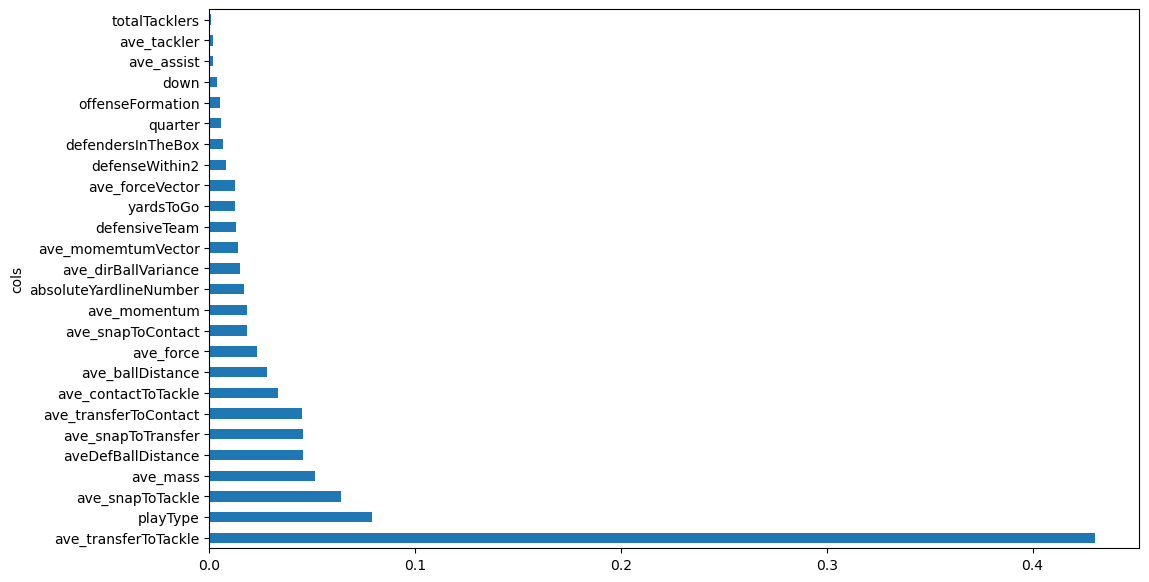

In [181]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi);

Maybe look at straight linear regression. Also maybe look at yards after the tackle as the dependent variable. 

# Look At Transfer To Tackle Influencers

In [216]:
weeks_predict_transferToTackle = weeks_predict_edit.copy()

In [217]:
weeks_predict_transferToTackle = weeks_predict_transferToTackle.drop(columns=['ave_contactToTackle', 'ave_snapToTackle',
                                                                             'ballTransferToTackle', 'ave_snapToContact',
                                                                             'ave_transferToContact'])

In [218]:
weeks_predict_transferToTackle.head(5)

,gamePlayId,ave_tackler,ave_assist,ave_mass,playType,absoluteYardlineNumber,quarter,defensiveTeam,down,yardsToGo,offenseFormation,defendersInTheBox,ave_ballDistance,ave_dirBallVariance,ave_momentum,ave_force,ave_momemtumVector,ave_forceVector,ave_snapToTransfer,ave_transferToTackle,defenseWithin2,aveDefBallDistance,totalTacklers
149,202209080056,1.00,0.00,1265.33,1,85.00,1.00,16,1.00,10.00,5,6.00,0.67,49.72,1.39,4.01,69.00,199.00,2.94,4.01,3.00,9.52,1
1161,202209080080,1.00,0.00,1418.33,0,79.00,1.00,16,2.00,4.00,1,6.00,0.37,1.00,7.97,2.77,8.00,3.00,0.00,6.77,2.00,10.77,1
1436,2022090800101,1.00,0.00,1088.67,2,72.00,1.00,16,1.00,10.00,2,6.00,2.48,52.92,1.96,5.41,104.00,286.00,1.27,4.89,2.00,6.90,1
2384,2022090800122,1.00,0.00,1452.00,1,65.00,1.00,16,2.00,3.00,5,6.00,0.57,8.35,4.63,4.21,39.00,35.00,2.85,12.01,2.00,12.72,1
4541,2022090800167,1.00,0.00,1540.00,1,57.00,1.00,16,2.00,8.00,1,6.00,1.59,4.62,6.41,10.21,30.00,47.00,2.09,6.91,3.00,9.81,1


In [219]:
weeks_predict_transferToTackle['ave_transferToTackle'] = weeks_predict_transferToTackle.pop('ave_transferToTackle')

In [220]:
X = weeks_predict_transferToTackle.drop(['gamePlayId', 'ave_transferToTackle'],axis=1)
y = weeks_predict_transferToTackle.ave_transferToTackle

In [221]:
X.shape, y.shape

((10035, 21), (10035,))

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)

In [223]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7526, 21), (2509, 21), (7526,), (2509,))

In [224]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [225]:
y_pred = rfr_model.predict(X_test)

In [226]:
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 0.5521848679247703


In [227]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [228]:
fi = rf_feat_importance(rfr_model, X)
fi

,cols,imp
13,ave_momentum,0.16
19,aveDefBallDistance,0.15
17,ave_snapToTransfer,0.10
14,ave_force,0.09
2,ave_mass,0.09
11,ave_ballDistance,0.07
4,absoluteYardlineNumber,0.04
3,playType,0.04
12,ave_dirBallVariance,0.04
6,defensiveTeam,0.03
